In [1]:
import csv
import plotly.express as px
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
rawdat = np.loadtxt('single_SA_19feb.txt', delimiter=',')
sadat = np.delete(rawdat, 0, 1)
columns = ['Error', 'k', 'mu', 'Rhf', 'Qhf', 'Phf', 'Y', 'Ks', 'DC', 'DS']
dat = pd.DataFrame(sadat, columns=columns)

In [3]:
dat

,Error,k,mu,Rhf,Qhf,Phf,Y,Ks,DC,DS
0,36317.775339,3.077217,0.000056,84.636212,43.053241,7.811981,178.786843,0.000128,4694.025382,42.698206
1,36476.270642,3.521926,0.000044,164.580228,63.698523,16.232319,129.836578,0.000123,6119.939901,110.453262
2,31558.561289,2.834072,0.000050,168.777333,8.665779,17.778520,40.617368,0.000229,2715.979282,198.860702
3,31349.304662,2.603138,0.000049,235.371889,29.317680,32.118984,40.498652,0.000160,2887.096685,156.675012
4,36477.736659,2.935945,0.000059,78.928406,11.835579,10.454637,703.021821,0.000407,2464.213916,291.486879
...,...,...,...,...,...,...,...,...,...,...
95,31399.578462,2.830081,0.000051,158.521144,17.586379,66.424057,43.062450,0.000125,1907.052401,87.864256
96,31706.158751,2.839063,0.000051,165.843223,7.070545,122.170096,40.681485,0.000377,1322.915440,97.091729
97,31441.065502,2.748177,0.000051,158.003696,19.261030,55.967697,40.381505,0.000072,2007.991412,138.139772
98,31219.000507,2.391750,0.000058,116.866300,22.887319,16.405831,42.616784,0.000067,2780.016220,116.540053


In [4]:
min(dat.Error)

31112.064022183593

In [5]:
cutdat = dat[dat.Error < 1.05*min(dat.Error)]


<AxesSubplot:>

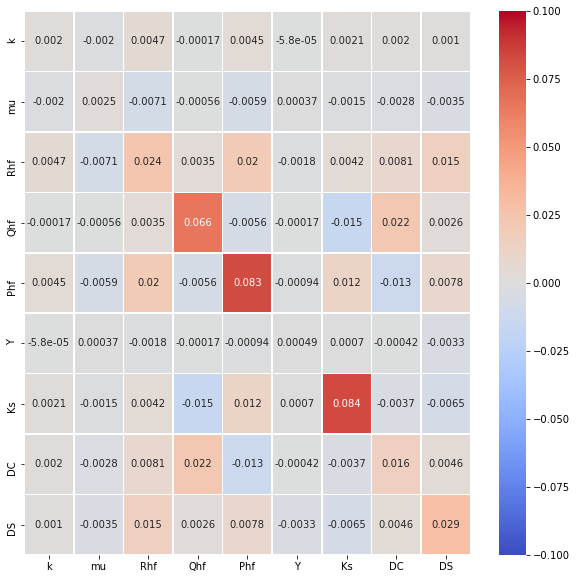

In [6]:
cutdat_ne = cutdat.drop("Error", axis=1)
cutdat_log = np.log10(cutdat_ne)
covmat = cutdat_log.cov()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(covmat, cmap ='coolwarm', vmin=-0.1, vmax=0.1, linewidths = 0.50, annot = True, ax=ax)

<AxesSubplot:>

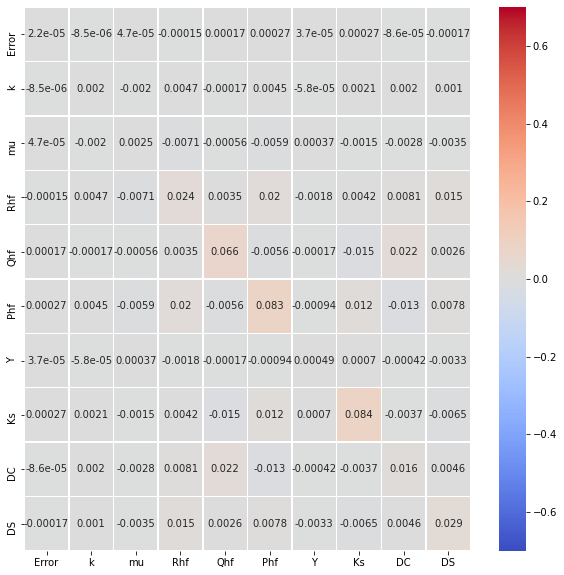

In [9]:
cutdat_ne = cutdat.drop("Error", axis=1)
cutdat_log = np.log10(cutdat)
covmat = cutdat_log.cov()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(covmat, cmap ='coolwarm', vmin=-0.7, vmax=0.7, linewidths = 0.50, annot = True, ax=ax)

<AxesSubplot:>

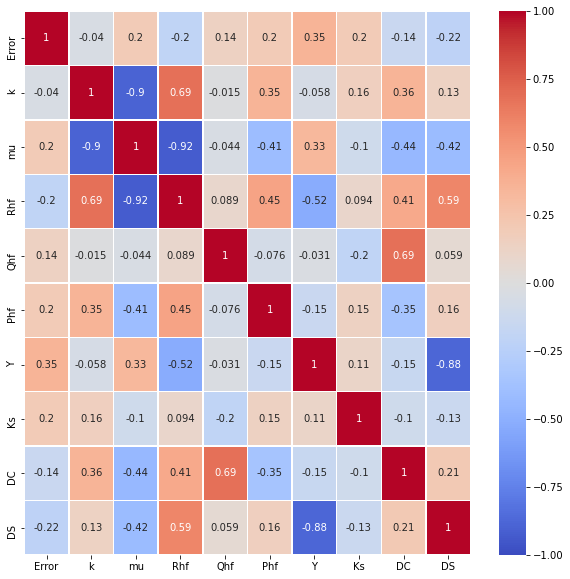

In [11]:
corrmat = cutdat_log.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrmat, cmap ='coolwarm', vmin=-1, vmax=1, linewidths = 0.50, annot = True, ax=ax)

<AxesSubplot:>

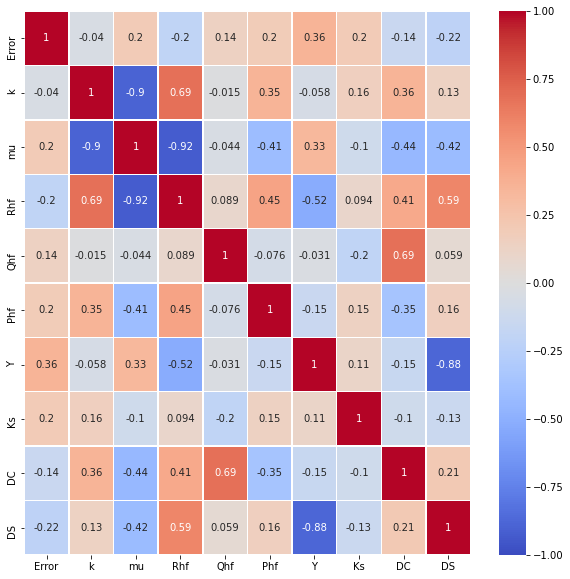

In [129]:
corrmat = cutdat_log.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrmat, cmap ='coolwarm', vmin=-1, vmax=1, linewidths = 0.50, annot = True, ax=ax)

In [127]:
dat[dat.Error == min(dat.Error)]

,Error,k,mu,Rhf,Qhf,Phf,Y,Ks,DC,DS
30,31112.064022,2.374178,0.000058,134.240283,27.915667,17.33258,41.246207,0.000176,2917.989396,131.877123


In [109]:
cutdat

,Error,k,mu,Rhf,Qhf,Phf,Y,Ks,DC,DS
2,31558.561289,2.834072,0.000050,168.777333,8.665779,17.778520,40.617368,0.000229,2715.979282,198.860702
3,31349.304662,2.603138,0.000049,235.371889,29.317680,32.118984,40.498652,0.000160,2887.096685,156.675012
5,31446.696159,2.749982,0.000048,278.430040,81.194335,28.284219,39.317034,0.000254,5622.933758,170.105416
7,31319.779979,2.564653,0.000056,122.100963,53.045699,18.529452,40.653620,0.000113,3593.246728,109.109927
8,32295.329165,3.091170,0.000049,152.115590,49.157546,17.458737,48.479553,0.000310,4900.903061,44.863789
...,...,...,...,...,...,...,...,...,...,...
95,31399.578462,2.830081,0.000051,158.521144,17.586379,66.424057,43.062450,0.000125,1907.052401,87.864256
96,31706.158751,2.839063,0.000051,165.843223,7.070545,122.170096,40.681485,0.000377,1322.915440,97.091729
97,31441.065502,2.748177,0.000051,158.003696,19.261030,55.967697,40.381505,0.000072,2007.991412,138.139772
98,31219.000507,2.391750,0.000058,116.866300,22.887319,16.405831,42.616784,0.000067,2780.016220,116.540053


In [10]:
# You must normalize the data before applying the fit method
df_normalized=(cutdat_log - cutdat_log.mean()) / cutdat_log.std()
pca = PCA(n_components=cutdat_log.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=cutdat_ne.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')

ValueError: Shape of passed values is (10, 10), indices imply (9, 10)

In [114]:
pca = PCA()
components = pca.fit_transform(df_normalized)
labels = {
    str(i): f"PC {i} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2)
)
fig.update_traces(diagonal_visible=False)

<AxesSubplot:>

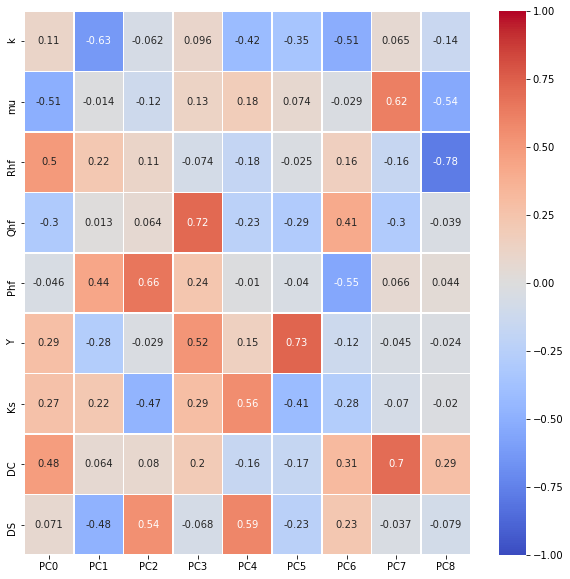

In [64]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(loadings, cmap ='coolwarm', vmin=-1, vmax=1, linewidths = 0.50, annot = True, ax=ax)

<AxesSubplot:xlabel='DC', ylabel='Error'>

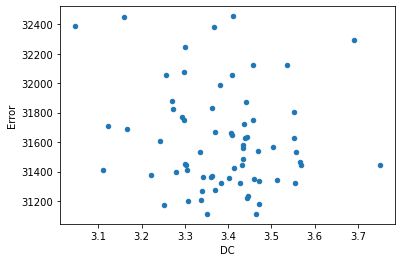

In [133]:
cutdat_log.plot.scatter(y='Error', x='DC')

In [118]:
cutdat_log = np.log10(cutdat)
cutdat_log['Error'] = 10**cutdat_log['Error'] 

In [92]:
p = np.array([[1,2,3],[4,0,9]])
q = np.array([[1,4,3],[4,10,9]])

In [93]:
a = p<4
b = q<4

In [94]:
a, b, a+b 

(array([[ True,  True,  True],
        [False,  True, False]]),
 array([[ True, False,  True],
        [False, False, False]]),
 array([[ True,  True,  True],
        [False,  True, False]]))

In [103]:
a

array([[ True,  True,  True],
       [False,  True, False]])

In [104]:
np.invert(a)

array([[False, False, False],
       [ True, False,  True]])